In [ ]:
import pandas as pd
from abc import ABC, abstractmethod
from typing import Union
from pathlib import Path
from IPython.display import display, HTML

class DataReader(ABC):
    @abstractmethod
    def load(self, source: Union[str, Path]) -> pd.DataFrame:
        pass

class ExcelAdapter(DataReader):
    def __init__(self, sheet_name: str | int | None = 0, **read_excel_kwargs):
        self.sheet_name = sheet_name
        self.kw = read_excel_kwargs

    def load(self, source: Union[str, Path]) -> pd.DataFrame:
        return pd.read_excel(source, sheet_name=self.sheet_name, **self.kw)

file_path = r"C:\Users\Dell\Desktop\ml_modular_system\input_module\data.xlsx"
reader = ExcelAdapter() 
df = reader.load(file_path)
display(df)


,datetime,EFAN_dps,EFAN_dpw,EHA_t,ETA_rh,ETA_t,ODA_rh,ODA_t,PHEA_rh,PHEA_t,...,check_dehum2,x_ist,x_soll,check1_and_xist_gt_xsoll,check1_3inrow,rule_based_anomaly,deviation,ODA_check_value,rolling_check1_count,ml_anomaly
0,2022-11-29 12:00:00,702.500000,5.25000,12.100000,30.700000,20.700000,89.000000,3.625000,49.000000,11.875000,...,True,4.371218,10,False,False,0,-5.628782,-5.641801,1,0
1,2022-11-29 12:15:00,702.500000,5.25000,12.100000,30.686833,20.700000,88.534819,3.625000,49.000000,11.875000,...,True,4.372252,10,False,False,0,-5.627748,-5.664739,2,0
2,2022-11-29 12:30:00,702.500000,5.25000,12.243500,30.615083,20.700000,88.055153,3.625000,48.674070,11.895371,...,True,4.378433,10,False,True,0,-5.621567,-5.688390,3,0
3,2022-11-29 12:45:00,702.500000,5.25000,12.300000,30.769833,20.700000,88.000000,3.701671,48.007773,11.937014,...,True,4.379833,10,False,True,0,-5.620167,-5.667604,4,0
4,2022-11-29 13:00:00,702.500000,5.25000,12.300000,30.869833,20.700000,88.000000,3.743454,48.000000,11.958157,...,True,4.384516,10,False,True,0,-5.615484,-5.654746,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90986,2025-07-04 06:30:00,673.000000,2493.25000,17.219981,43.728153,24.900000,83.256740,14.639361,58.025348,19.993663,...,True,7.616642,10,False,True,0,-2.383358,-1.368661,6,0
90987,2025-07-04 06:45:00,717.750000,2494.75000,18.051117,43.771866,24.928134,80.144920,15.401269,56.698336,20.528801,...,True,7.632800,10,False,True,0,-2.367200,-1.272140,6,0
90988,2025-07-04 07:00:00,671.500000,2494.25000,18.300000,43.721843,24.978157,77.836008,15.978497,56.021536,20.803751,...,True,7.612166,10,False,True,0,-2.387834,-1.203350,6,0
90989,2025-07-04 07:15:00,678.733226,2494.38058,18.300000,43.428581,25.000000,76.000000,16.437500,53.517390,20.998696,...,True,7.560627,10,False,True,0,-2.439373,-1.154937,6,0


In [2]:

import builtins
from typing import Callable
from collections import defaultdict
import pandas as pd

# ---- XSoll-Subjekt 
if not hasattr(builtins, "x_soll_subject"):
    class XSollSubject:
        def __init__(self, value: float = 10.0):
            self._value: float = value
            self._observers: set[Callable[[float], None]] = set()          
            self._topic_subs = defaultdict(set)                          

        @property
        def value(self) -> float:
            return self._value

        def set(self, v: float):
            if v != self._value:
                self._value = float(v)
                for cb in tuple(self._observers):
                    try:
                        cb(self._value)
                    except Exception:
                        pass

        def attach(self, cb: Callable[[float], None]):
            self._observers.add(cb)

        def detach(self, cb: Callable[[float], None]):
            self._observers.discard(cb)

        # ---- general events (channels) ----
        def attach_event(self, channel: str, cb: Callable[[object], None]):
            self._topic_subs[channel].add(cb)

        def detach_event(self, channel: str, cb: Callable[[object], None]):
            self._topic_subs[channel].discard(cb)

        def emit(self, channel: str, payload):
            for cb in tuple(self._topic_subs[channel]):
                try:
                    cb(payload)
                except Exception:
                    pass

    builtins.x_soll_subject = XSollSubject(10.0)

# helper
def set_x_soll(v: float):
    builtins.x_soll_subject.set(v)

#  (hier anpassen)
X_SOLL = 10

# x_soll-Beobachter benachrichtigen
set_x_soll(X_SOLL)

clean = df.copy()

clean["x_soll"] = X_SOLL

if "datetime" not in clean.columns and clean.index.name == "datetime":
    clean = clean.reset_index()

cols_base = ["datetime", "ODA_x", "x_ist", "x_soll"]
clean = clean[cols_base].copy()

clean["x_soll"] = builtins.x_soll_subject.value


# datetime format & cleaning
clean["datetime"] = pd.to_datetime(clean["datetime"], errors="coerce")
clean.dropna(inplace=True)



""""
eps_x_dehum = 0.7
clean["deviation"] = clean["x_ist"] - clean["x_soll"]

clean["is_anomaly"] = (
    ((clean["deviation"] > 0.7)) |
    (clean["ODA_x"] >= clean["x_soll"])
"""


eps_x_dehum = 0.7
clean["deviation"] = clean["x_ist"] - clean["x_soll"]

clean["is_anomaly"] = (
    (clean["deviation"] > 0.7) |
    ((clean["x_ist"] > clean["x_soll"]) & (clean["x_ist"] > clean["x_soll"] + 0.7)) |
    ((clean["x_ist"] > clean["x_soll"]) & (clean["ODA_x"] > clean["x_soll"] + 0.7))
)





raw = (clean["x_ist"] > clean["x_soll"]).fillna(False).to_numpy()
conf = raw.copy()
if len(raw) < 4:
    conf[:len(raw)] = False
elif raw[:4].all():
    conf[:4] = True
elif not raw[3]:
    conf[:4] = False
else:
    conf[:3] = False

# Sortierung und Index
clean.sort_values("datetime", inplace=True)
clean.set_index("datetime", inplace=True)

from IPython.display import display
display(clean)

df_clean = clean.copy()
anzahl_anomalien = df_clean["is_anomaly"].sum()
print(f"Anzahl der Anomalien: {anzahl_anomalien}")


,ODA_x,x_ist,x_soll,deviation,is_anomaly
datetime,,,,,
2022-11-29 12:00:00,4.358199,4.371218,10.0,-5.628782,False
2022-11-29 12:15:00,4.335261,4.372252,10.0,-5.627748,False
2022-11-29 12:30:00,4.311610,4.378433,10.0,-5.621567,False
2022-11-29 12:45:00,4.332396,4.379833,10.0,-5.620167,False
2022-11-29 13:00:00,4.345254,4.384516,10.0,-5.615484,False
...,...,...,...,...,...
2025-07-04 06:30:00,8.631339,7.616642,10.0,-2.383358,False
2025-07-04 06:45:00,8.727860,7.632800,10.0,-2.367200,False
2025-07-04 07:00:00,8.796650,7.612166,10.0,-2.387834,False


Anzahl der Anomalien: 1759


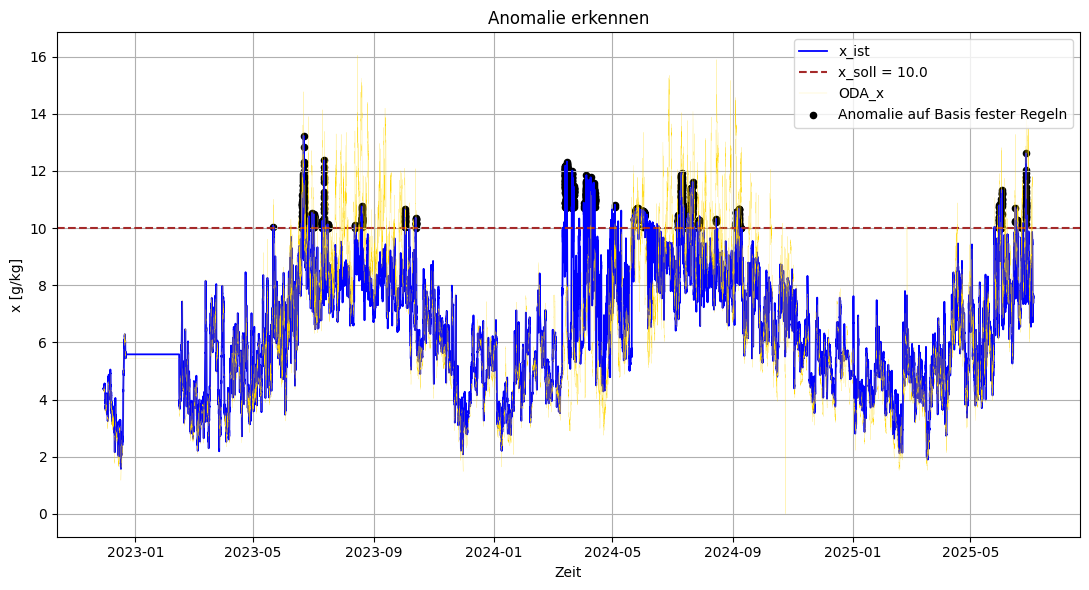

In [3]:
# --- Cell 3: Plot ---
import matplotlib.pyplot as plt
import pandas as pd
import builtins  # notwendig, um den aktuellen Wert des Subjekts zu lesen

df_processed = df_clean.copy()

if "is_anomaly" in df_processed.columns:
    plt.figure(figsize=(11,6))

    x = df_processed.index
    plt.plot(x, df_processed["x_ist"], label="x_ist", color="blue", linewidth=1.3)

    _x_soll = builtins.x_soll_subject.value  
    plt.axhline(y=_x_soll, linestyle="--", label=f"x_soll = {_x_soll}", color="brown")

    plt.plot(x, df_processed["ODA_x"], label="ODA_x", color="Gold", linewidth=0.1)

    anomalies = df_processed[df_processed["is_anomaly"]]
    plt.scatter(anomalies.index, anomalies["x_ist"], s=20, label="Anomalie auf Basis fester Regeln", color="black")

    plt.title("Anomalie erkennen")
    plt.xlabel("Zeit")
    plt.ylabel("x [g/kg]")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()
else:
    print("[ERROR] .'is_anomaly' nicht gefunden. Bitte wende zuerst die Regeln an. ")


In [4]:
df_export = df_clean[[ "ODA_x", "x_ist", "x_soll", "deviation"]].copy()


In [5]:

def load_and_clean_data(file_path=None):
    if "df_clean" not in globals():
        raise RuntimeError("df_clean nicht gefunden. Führe zuerst die Zellen 1→4 aus.")
    return df_clean.copy()

def main(path=None):
    return load_and_clean_data(path)


